In [1]:
import cv2
import numpy as np
from PIL import Image as im
from matplotlib import pyplot as plt

def add_snow(image):    
        image_HLS = cv2.cvtColor(image,cv2.COLOR_RGB2HLS) 
        ## Conversion to HLS    
        image_HLS = np.array(image_HLS, dtype = np.float64)     
        brightness_coefficient = 2.5     
        snow_point=100 ## increase this for more snow    
        image_HLS[:,:,1][image_HLS[:,:,1]<snow_point] = image_HLS[:,:,1][image_HLS[:,:,1]<snow_point]*brightness_coefficient 
        ## scale pixel values up for channel 1(Lightness)    
        image_HLS[:,:,1][image_HLS[:,:,1]>255]  = 255 
        ##Sets all values above 255 to 255    
        image_HLS = np.array(image_HLS, dtype = np.uint8)    
        image_RGB = cv2.cvtColor(image_HLS,cv2.COLOR_HLS2RGB) 
        ## Conversion to RGB    
        return image_RGB

In [2]:
src = cv2.imread('../dataset/images/val/00887.jpg') #поменяйте номер изображения на любой в val директории

In [4]:
snowy_image = add_snow(src)
data2 = im.fromarray(snowy_image)

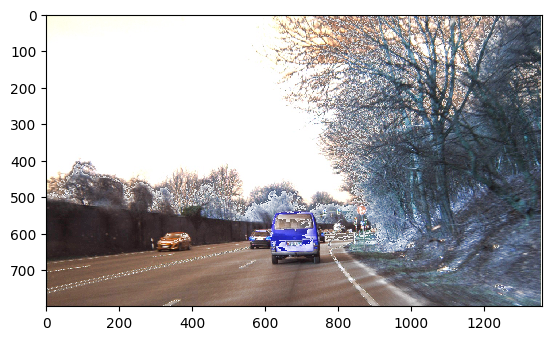

In [5]:
plt.imshow(data2, interpolation='nearest')
plt.show()

In [ ]:
data2.save('snowy_image.jpg')

In [ ]:
#надо поменять все флаги на существующие

In [ ]:
!python detect.py --source snowy_image.jpg --weights ../yolov5/runs/train/exp2/weights/best.pt --data ../dataset/dataset.yaml

In [ ]:
def generate_random_lines(imshape,slant,drop_length):    
    drops=[]    
    for i in range(1500): 
    ## If You want heavy rain, try increasing this    
        if slant<0:
            x= np.random.randint(slant,imshape[1])        
        else:            
            x= np.random.randint(0,imshape[1]-slant)        
        y= np.random.randint(0,imshape[0]-drop_length)        
        drops.append((x,y))   
    return drops            
    
def add_rain(image):        
    imshape = image.shape    
    slant_extreme=10    
    slant= np.random.randint(-slant_extreme,slant_extreme)     
    drop_length=20    
    drop_width=2    
    drop_color=(200,200,200)
    ## a shade of gray    
    rain_drops= generate_random_lines(imshape,slant,drop_length)        
    for rain_drop in rain_drops:        
        cv2.line(image,(rain_drop[0],rain_drop[1]),(rain_drop[0]+slant,rain_drop[1]+drop_length),drop_color,drop_width)    
#         image= cv2.blur(image,(7,7)) 
        ## rainy view are blurry        
        brightness_coefficient = 0.7 
        ## rainy days are usually shady     
        image_HLS = cv2.cvtColor(image,cv2.COLOR_RGB2HLS) 
        ## Conversion to HLS    
        image_HLS[:,:,1] = image_HLS[:,:,1]*brightness_coefficient 
        ## scale pixel values down for channel 1(Lightness)    
        image_RGB = cv2.cvtColor(image_HLS,cv2.COLOR_HLS2RGB) 
        ## Conversion to RGB    
    return image_RGB

In [ ]:
src3 = cv2.imread('/kaggle/working/dataset/images/val/00884.jpg')
rainy_image = add_rain(src3)
data3 = im.fromarray(rainy_image)

In [ ]:
plt.imshow(data3, interpolation='nearest')
plt.show()

In [ ]:
data3.save('rainy_image.jpg')

In [ ]:
!python detect.py --source rainy_image.jpg --weights runs/train/exp2/weights/best.pt --data ../dataset/dataset.yaml